In [1]:
import sys
import os
import pandas as pd
sys.path = [os.path.abspath('..')] + sys.path
import seaborn as sns
from collections import Counter
from utils import settings, data_loader, features, exceptions, preprocessing

In [2]:
data = data_loader.get_raw_data()

In [3]:
train, test = data_loader.train_test_split(data['student_info'])

In [4]:
train.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


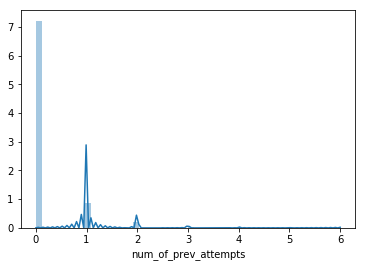

In [5]:
sns.distplot(train['num_of_prev_attempts'])

In [6]:
data.keys()

dict_keys(['student_assessment', 'student_info', 'student_vle', 'courses', 'vle', 'student_registration', 'assessments'])

In [7]:
cat = preprocessing.CategoricalFeature()

In [8]:
num = preprocessing.NumericFeature()

In [9]:
x = pd.DataFrame({'col': [1, 2, 3, None]})

In [10]:
num.fit_transform(x)

,col
0,-1.0
1,0.0
2,1.0
3,0.0


In [11]:
y = cat.fit_transform(train[['gender']])

In [12]:
y

,gender_M,gender_F
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,0.0,1.0
8,0.0,1.0
9,1.0,0.0


In [31]:
for i in train[['gender']].iterrows():
    print(i)

('gender', 0        M
1        F
2        F
3        F
4        F
5        M
6        M
7        F
8        F
9        M
10       M
11       F
12       M
13       F
14       M
15       F
16       F
17       M
18       M
19       M
20       M
21       M
22       M
23       M
24       M
25       M
26       M
27       M
28       M
29       M
        ..
31814    F
31815    F
31816    F
31817    F
31818    F
31819    F
31820    F
31821    F
31822    F
31823    F
31824    M
31825    F
31826    M
31827    M
31828    F
31829    F
31830    F
31831    F
31832    F
31833    F
31834    F
31835    F
31836    F
31837    F
31838    F
31839    F
31840    M
31841    F
31842    F
31843    F
Name: gender, Length: 21333, dtype: object)


In [23]:
y = cat.fit_transform(train['gender'].values)

ValueError: Expected 2D array, got 1D array instead:
array=['M' 'F' 'F' ... 'F' 'F' 'F'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
train[['gender']].values

array([['M'],
       ['F'],
       ['F'],
       ...,
       ['F'],
       ['F'],
       ['F']], dtype=object)

In [19]:
cat.encoder.categories_

[array(['gender'], dtype=object)]

In [18]:
cat.categories_

AttributeError: 'CategoricalFeature' object has no attribute 'categories_'

In [13]:
train['gender'].value_counts()

M    11376
F     9957
Name: gender, dtype: int64

In [7]:
class FeatureDict(dict):
    pass

In [8]:
fd = FeatureDict()

In [10]:
fd['cool'] = 1

In [11]:
fd

{'cool': 1}